# <center>Consumer Complaints Prediction Model</center>

# Set Darwin SDK

In [207]:
from amb_sdk.sdk import DarwinSdk
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')

(True, 'https://amb-demo-api.sparkcognition.com/v1/')

# Set Environment

In [208]:
#Set your user id and password accordingly
USER="huilin@utexas.edu"
PW="3wweEPYBrh"

status, msg = ds.auth_login_user(USER,PW)
if not status:
    print(msg)

# Import Useful Libraries

In [209]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import classification_report

In [210]:
data=pd.read_csv("Customer.csv")
data.head()

,complaint_id,date_received,date_sent_to_company,company,product,sub_product,issue,submitted_via,company_public_response,state,zip_code,company_response,consumer_disputed,sub_issue,complaint_what_happened,consumer_consent_provided,timely,tags
0,2687803,2017-09-28T00:00:00,2017-09-28T00:00:00,"Stuart-Lippman and Associates, Inc","Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Web,NaN,FL,33025,Closed with explanation,NaN,Reporting company used your report improperly,NaN,Consent not provided,Yes,NaN
1,2686871,2017-09-28T00:00:00,2017-09-28T00:00:00,"Seterus, Inc.",Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Web,Company has responded to the consumer and the ...,CA,927XX,Closed with explanation,NaN,NaN,In XXXX my husband and I purchased a home in X...,Consent provided,Yes,NaN
2,2687796,2017-09-28T00:00:00,2017-09-28T00:00:00,"EQUIFAX, INC.","Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Web,NaN,CA,94063,Closed with explanation,NaN,Information is missing that should be on the r...,NaN,Consent not provided,Yes,NaN
3,2687665,2017-09-28T00:00:00,2017-09-28T00:00:00,"Pinnacle Credit Services, LLC",Debt collection,Other debt,Attempts to collect debt not owed,Web,NaN,NJ,NaN,Closed with explanation,NaN,Debt was paid,I received on my credit report a collection fo...,Consent provided,Yes,NaN
4,2687965,2017-09-28T00:00:00,2017-09-29T00:00:00,Experian Information Solutions Inc.,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Web,Company has responded to the consumer and the ...,WA,98072,Closed with explanation,NaN,Personal information incorrect,NaN,Consent not provided,Yes,NaN


# Clean the Dataset

In [211]:
# count unique values of each column
data.nunique()

complaint_id                 1255641
date_received                   2682
date_sent_to_company            2631
company                         5253
product                           18
sub_product                       76
issue                            167
submitted_via                      6
company_public_response           10
state                             63
zip_code                       22456
company_response                   8
consumer_disputed                  2
sub_issue                        218
complaint_what_happened       361803
consumer_consent_provided          4
timely                             2
tags                               3
dtype: int64

In [273]:
# drop columns that Darwin is unable to handle (long strings, mixed types)
dropped=data.drop(columns=['complaint_what_happened','sub_product','complaint_id','date_received','date_sent_to_company','company_response','company_public_response','zip_code','complaint_what_happened','submitted_via','sub_issue'])
dropped.head()

,company,product,issue,state,consumer_disputed,consumer_consent_provided,timely,tags
0,"Stuart-Lippman and Associates, Inc","Credit reporting, credit repair services, or o...",Improper use of your report,FL,NaN,Consent not provided,Yes,NaN
1,"Seterus, Inc.",Mortgage,Applying for a mortgage or refinancing an exis...,CA,NaN,Consent provided,Yes,NaN
2,"EQUIFAX, INC.","Credit reporting, credit repair services, or o...",Incorrect information on your report,CA,NaN,Consent not provided,Yes,NaN
3,"Pinnacle Credit Services, LLC",Debt collection,Attempts to collect debt not owed,NJ,NaN,Consent provided,Yes,NaN
4,Experian Information Solutions Inc.,"Credit reporting, credit repair services, or o...",Incorrect information on your report,WA,NaN,Consent not provided,Yes,NaN


In [274]:
# drop rows that contain null values
dropped1=dropped.dropna(subset=['consumer_consent_provided','consumer_disputed','state','issue','timely'])
dropped1

,company,product,issue,state,consumer_disputed,consumer_consent_provided,timely,tags
344829,CAPITAL ONE FINANCIAL CORPORATION,Credit card,Other,NY,No,Consent provided,Yes,NaN
344830,WELLS FARGO & COMPANY,Mortgage,"Loan servicing, payments, escrow account",AZ,No,Other,Yes,NaN
344831,U.S. BANCORP,Bank account or service,"Account opening, closing, or management",IL,No,Consent provided,Yes,NaN
344833,ENCORE CAPITAL GROUP INC.,Credit reporting,Incorrect information on credit report,NY,No,Consent provided,Yes,NaN
344834,WELLS FARGO & COMPANY,Mortgage,"Application, originator, mortgage broker",CA,No,Other,Yes,Older American
344835,CAPITAL ONE FINANCIAL CORPORATION,Credit card,Delinquent account,GA,No,Consent provided,Yes,NaN
344836,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Credit reporting,Incorrect information on credit report,IL,No,Consent not provided,Yes,NaN
344837,Experian Information Solutions Inc.,Credit reporting,Incorrect information on credit report,CA,No,Consent not provided,Yes,NaN
344838,"EQUIFAX, INC.",Credit reporting,Incorrect information on credit report,NY,No,Consent not provided,Yes,NaN
344839,"Navient Solutions, LLC.",Student loan,Dealing with my lender or servicer,NC,No,Consent provided,Yes,NaN


In [275]:
# count unique values of each column of the reduced dataset
dropped1.nunique()

company                      3653
product                        12
issue                          91
state                          62
consumer_disputed               2
consumer_consent_provided       4
timely                          2
tags                            3
dtype: int64

In [276]:
# select companies that have 9000+ rows
split=dropped1.groupby('company').filter(lambda x : len(x)>9000)
split

,company,product,issue,state,consumer_disputed,consumer_consent_provided,timely,tags
344830,WELLS FARGO & COMPANY,Mortgage,"Loan servicing, payments, escrow account",AZ,No,Other,Yes,NaN
344834,WELLS FARGO & COMPANY,Mortgage,"Application, originator, mortgage broker",CA,No,Other,Yes,Older American
344836,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Credit reporting,Incorrect information on credit report,IL,No,Consent not provided,Yes,NaN
344837,Experian Information Solutions Inc.,Credit reporting,Incorrect information on credit report,CA,No,Consent not provided,Yes,NaN
344838,"EQUIFAX, INC.",Credit reporting,Incorrect information on credit report,NY,No,Consent not provided,Yes,NaN
344839,"Navient Solutions, LLC.",Student loan,Dealing with my lender or servicer,NC,No,Consent provided,Yes,NaN
344845,"EQUIFAX, INC.",Credit reporting,Incorrect information on credit report,IN,No,Consent not provided,Yes,NaN
344847,Experian Information Solutions Inc.,Credit reporting,Credit reporting company's investigation,IL,No,Consent provided,Yes,NaN
344855,"CITIBANK, N.A.",Credit card,Credit card protection / Debt protection,WI,No,Consent provided,Yes,NaN
344856,WELLS FARGO & COMPANY,Mortgage,"Loan servicing, payments, escrow account",NY,No,Other,Yes,NaN


In [277]:
# count unique values of each column of the reduced dataset
split.nunique()

company                       8
product                      11
issue                        88
state                        62
consumer_disputed             2
consumer_consent_provided     4
timely                        2
tags                          3
dtype: int64

In [278]:
# count number of rows for each company
split.groupby(['company']).size()

company
BANK OF AMERICA, NATIONAL ASSOCIATION     12276
CITIBANK, N.A.                            12192
EQUIFAX, INC.                             24584
Experian Information Solutions Inc.       20865
JPMORGAN CHASE & CO.                      10870
Navient Solutions, LLC.                   10946
TRANSUNION INTERMEDIATE HOLDINGS, INC.    20668
WELLS FARGO & COMPANY                     13323
dtype: int64

In [323]:
# reduce the dataset to 5000 rows
parts=split.sample(n = 5000)
# count number of rows for each product of the reduced dataset
parts.groupby(['product']).size()



product
Bank account or service     489
Consumer Loan                60
Credit card                 583
Credit reporting           2607
Debt collection             160
Money transfers              21
Mortgage                    633
Other financial service       2
Payday loan                   3
Prepaid card                  8
Student loan                434
dtype: int64

In [328]:
# delete products that have few samples for the target
parts1 = parts[parts['product'] != 'Other financial service']
parts2 = parts1[parts1['product'] != 'Payday loan']
parts2

,company,product,issue,state,consumer_disputed,consumer_consent_provided,timely,tags
595741,Experian Information Solutions Inc.,Credit reporting,Incorrect information on credit report,VT,No,Consent not provided,Yes,NaN
592376,"BANK OF AMERICA, NATIONAL ASSOCIATION",Mortgage,"Loan servicing, payments, escrow account",MA,Yes,Consent not provided,Yes,NaN
467167,"EQUIFAX, INC.",Credit reporting,Incorrect information on credit report,MD,Yes,Consent provided,Yes,Servicemember
575402,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Credit reporting,Incorrect information on credit report,MD,No,Consent not provided,Yes,NaN
557143,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Credit reporting,Incorrect information on credit report,CA,No,Consent not provided,Yes,NaN
409533,"Navient Solutions, LLC.",Debt collection,Improper contact or sharing of info,LA,No,Consent provided,Yes,NaN
606050,Experian Information Solutions Inc.,Credit reporting,Incorrect information on credit report,CA,No,Consent not provided,Yes,Older American
651819,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Credit reporting,Unable to get credit report/credit score,IL,No,Consent not provided,Yes,NaN
503078,Experian Information Solutions Inc.,Credit reporting,Credit reporting company's investigation,IL,No,Consent provided,Yes,NaN
357208,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Credit reporting,Incorrect information on credit report,KY,No,Consent provided,Yes,NaN


In [329]:
parts2.groupby(['product']).size()

product
Bank account or service     489
Consumer Loan                60
Credit card                 583
Credit reporting           2607
Debt collection             160
Money transfers              21
Mortgage                    633
Prepaid card                  8
Student loan                434
dtype: int64

In [330]:
parts.nunique()

company                       8
product                       9
issue                        70
state                        56
consumer_disputed             2
consumer_consent_provided     3
timely                        2
tags                          3
dtype: int64

In [331]:
ds.delete_all_datasets()

Deleting Consumer_Parts4.csv
Error removing dataset "Consumer_Parts4.csv" - 403: FORBIDDEN - {"message": "Dataset is in use by an active job"}



(True, None)

In [332]:
# save the final (reduced) dataset
parts.to_csv("Consumer_Parts.csv")

# Upload the New Dataset to Darwin

In [333]:
#ds.delete_all_artifacts()

(True, None)

In [334]:
# Preview dataset
# Set path to datasets - The default below assumes Jupyter was started from amb-sdk/examples/Enterprise/
# Modify accordingly if you wish to use your own data

DATASET = "Consumer_Parts.csv"

df = pd.read_csv(os.path.join(DATASET))
df


,Unnamed: 0,company,product,issue,state,consumer_disputed,consumer_consent_provided,timely,tags
0,595741,Experian Information Solutions Inc.,Credit reporting,Incorrect information on credit report,VT,No,Consent not provided,Yes,NaN
1,592376,"BANK OF AMERICA, NATIONAL ASSOCIATION",Mortgage,"Loan servicing, payments, escrow account",MA,Yes,Consent not provided,Yes,NaN
2,467167,"EQUIFAX, INC.",Credit reporting,Incorrect information on credit report,MD,Yes,Consent provided,Yes,Servicemember
3,575402,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Credit reporting,Incorrect information on credit report,MD,No,Consent not provided,Yes,NaN
4,557143,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Credit reporting,Incorrect information on credit report,CA,No,Consent not provided,Yes,NaN
5,409533,"Navient Solutions, LLC.",Debt collection,Improper contact or sharing of info,LA,No,Consent provided,Yes,NaN
6,606050,Experian Information Solutions Inc.,Credit reporting,Incorrect information on credit report,CA,No,Consent not provided,Yes,Older American
7,651819,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Credit reporting,Unable to get credit report/credit score,IL,No,Consent not provided,Yes,NaN
8,503078,Experian Information Solutions Inc.,Credit reporting,Credit reporting company's investigation,IL,No,Consent provided,Yes,NaN
9,357208,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Credit reporting,Incorrect information on credit report,KY,No,Consent provided,Yes,NaN


In [335]:

# A timestamp is used to create a unique name in the event you execute the workflow multiple times or with 
# different datasets.  File names must be unique in Darwin.
import datetime
ts = '{:%Y%m%d%H%M%S}'.format(datetime.datetime.now())
# Upload dataset
status, dataset = ds.upload_dataset(os.path.join(DATASET))
if not status:
    print(dataset)

# Clean Dataset Using Darwin 

In [336]:
# clean dataset
target = "product"
status, job_id = ds.clean_data(DATASET, target = target)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-22T19:42:54.332153', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['Consumer_Parts.csv'], 'artifact_names': ['8401f18b6335415894169b83d4ade94c'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-22T19:42:54.332153', 'endtime': '2019-04-22T19:42:57.707965', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['Consumer_Parts.csv'], 'artifact_names': ['8401f18b6335415894169b83d4ade94c'], 'model_name': None, 'job_error': ''}


# Create and Train Model
We will now build a model that will learn the class labels in the target column.
In the default dataset, the target column is "product". 
You will have to specify your own target name for your custom dataset. 
You can also increase max_train_time for longer training.

In [346]:
#ds.delete_all_models()

Deleting product_model20190422194248
Deleting product_mode20190422190738
Deleting product_mode20190422194248
Error removing model "product_mode20190422194248" - 403: FORBIDDEN - {"message": "Model is in use by an active job"}



(True, None)

In [347]:
model = target + "_model" + ts
status, job_id = ds.create_model(dataset_names = DATASET, \
                                 model_name =  model, \
                                 max_train_time = '00:15')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-22T19:59:00.610471', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['Consumer_Parts.csv'], 'artifact_names': None, 'model_name': 'product_model20190422194248', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-22T19:59:00.610471', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': 1.6360806226730347, 'generations': 3, 'dataset_names': ['Consumer_Parts.csv'], 'artifact_names': None, 'model_name': 'product_model20190422194248', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-22T19:59:00.610471', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': 1.6360806226730347, 'generations': 3, 'dataset_names': ['Consumer_Parts.csv'], 'artifact_names': None, 'model_name': 'product_model20190422194248', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-22T19:59:00.610471', 'endtime': None, 'percent_complet

# Extra Training (Optional)
Run the following cell for extra training, no need to specify parameters

In [348]:
# Train some more
status, job_id = ds.resume_training_model(dataset_names = DATASET,
                                          model_name = model,
                                          max_train_time = '00:40')
                                          
if status:
    ds.wait_for_job(job_id['job_name'],time_limit=720)
else:
    print(job_id)

{'status': 'Taken', 'starttime': '2019-04-22T20:05:04.655695', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 1.6360806226730347, 'generations': 3, 'dataset_names': ['Consumer_Parts.csv'], 'artifact_names': None, 'model_name': 'product_model20190422194248', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-22T20:05:04.655695', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 1.6360806226730347, 'generations': 6, 'dataset_names': ['Consumer_Parts.csv'], 'artifact_names': None, 'model_name': 'product_model20190422194248', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-22T20:05:04.655695', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 1.6360806226730347, 'generations': 6, 'dataset_names': ['Consumer_Parts.csv'], 'artifact_names': None, 'model_name': 'product_model20190422194248', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-22T20:05:04.655695', 'endtime': None, 'pe

# Analyze Model
Analyze model provides feature importance ranked by the model. 
It indicates a general view of which features pose a bigger impact on the model.

In [349]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-22T20:09:26.718831', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 1.6360806226730347, 'generations': 6, 'dataset_names': None, 'artifact_names': ['99beb7a396ea4bc6858f91e1e9b02f98'], 'model_name': 'product_model20190422194248', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-22T20:09:26.718831', 'endtime': '2019-04-22T20:09:28.181694', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 1.6360806226730347, 'generations': 6, 'dataset_names': None, 'artifact_names': ['99beb7a396ea4bc6858f91e1e9b02f98'], 'model_name': 'product_model20190422194248', 'job_error': ''}


# Show the 10 most important features of the model

In [350]:
feature_importance[:10]

Unnamed: 0                                          0.239051
company = Navient Solutions, LLC.                   0.134863
company = EQUIFAX, INC.                             0.127149
company = Experian Information Solutions Inc.       0.114966
company = TRANSUNION INTERMEDIATE HOLDINGS, INC.    0.106481
company = CITIBANK, N.A.                            0.093664
company = WELLS FARGO & COMPANY                     0.074992
company = JPMORGAN CHASE & CO.                      0.044857
timely = Yes                                        0.017372
consumer_consent_provided = Consent provided        0.012214
dtype: float64

# Predictions
Perform model prediction on the the training dataset.

In [352]:
status, artifact = ds.run_model(DATASET, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-22T20:10:31.357282', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 1.6360806226730347, 'generations': 6, 'dataset_names': ['Consumer_Parts.csv'], 'artifact_names': ['b7510baad738458dbe629f8a5bda6d7b'], 'model_name': 'product_model20190422194248', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-22T20:10:31.357282', 'endtime': '2019-04-22T20:10:32.65918', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 1.6360806226730347, 'generations': 6, 'dataset_names': ['Consumer_Parts.csv'], 'artifact_names': ['b7510baad738458dbe629f8a5bda6d7b'], 'model_name': 'product_model20190422194248', 'job_error': ''}


(True, 'Job completed')

In [353]:
status, prediction = ds.download_artifact(artifact['artifact_name'])

/Users/roy/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                         precision    recall  f1-score   support

Bank account or service       0.62      0.58      0.60       489
          Consumer Loan       1.00      0.03      0.06        60
            Credit card       0.60      0.72      0.65       583
       Credit reporting       0.99      0.99      0.99      2607
        Debt collection       0.65      0.11      0.18       160
        Money transfers       0.00      0.00      0.00        21
               Mortgage       0.62      0.76      0.68       633
           Prepaid card       0.00      0.00      0.00         8
           Student loan       0.92      0.90      0.91       434

              micro avg       0.84      0.84      0.84      4995
              macro avg       0.60      0.45      0.45      4995
           weighted avg       0.84      0.84      0.82      4995



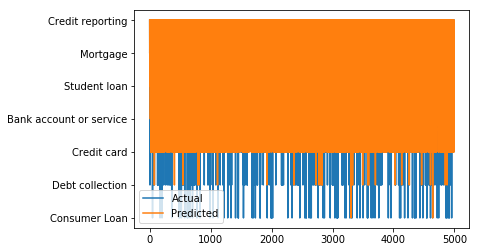

In [356]:
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

In [355]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

{'type': 'XGBClassifier', 'parameters': {}}
